In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25
n_classes = 2
INPUT_SHAPE = [BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS]

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
train = train_datagen.flow_from_directory('E:\\Datasets\\Kaggle DL\\CNN\\Chest X-Ray\\train',
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

Found 2506 images belonging to 2 classes.


In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255)

val = val_datagen.flow_from_directory('E:\\Datasets\\Kaggle DL\\CNN\\Chest X-Ray\\val',
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test = test_datagen.flow_from_directory('E:\\Datasets\\Kaggle DL\\CNN\\Chest X-Ray\\test',
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary',
                                            shuffle=False)



Found 316 images belonging to 2 classes.


In [7]:
labels = train.class_indices
list(labels.keys())

['NORMAL', 'PNEUMONIA']

In [8]:
# Get the counts for each class

from collections import Counter
cases_count = Counter(train.classes)
print(cases_count.items())

dict_items([(0, 1113), (1, 1393)])


In [9]:
# Weight class to balance the data

total = cases_count[0] + cases_count[1]
weight_for_0 = (1 / cases_count[0]) * (total / 2.0)
weight_for_1 = (1 / cases_count[1]) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print(class_weight)

{0: 1.1257861635220126, 1: 0.8994974874371859}


In [10]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [IMAGE_SIZE, IMAGE_SIZE, CHANNELS]))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units = 64, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [13]:
runtime = model.fit(train, 
                    validation_data = val, 
                    epochs = 25,
                    class_weight = class_weight,
                    batch_size = BATCH_SIZE)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/25
79/79 [==============================] - 146s 1s/step - loss: 0.4917 - accuracy: 0.7386 - val_loss: 0.3714 - val_accuracy: 0.8622
Epoch 2/25
79/79 [==============================] - 67s 852ms/step - loss: 0.3197 - accuracy: 0.8823 - val_loss: 0.2702 - val_accuracy: 0.8766
Epoch 3/25
79/79 [==============================] - 53s 677ms/step - loss: 0.2863 - accuracy: 0.8879 - val_loss: 0.2464 - val_accuracy: 0.8990
Epoch 4/25
79/79 [==============================] - 54s 677ms/step - loss: 0.2477 - accuracy: 0.9086 - val_loss: 0.2073 - val_accuracy: 0.9247
Epoch 5/25
79/79 [==============================] - 55s 701ms/step - loss: 0.2372 - accuracy: 0.9166 - val_loss: 0.2199 - val_accuracy: 0.9167
Epoch 6/25
79/79 [==============================] - 60s 760ms/step - loss: 0.2489 - accuracy: 0.9058 - val_loss: 0.1958 - val_accuracy: 0.9295
Epoch 

In [14]:
scores = model.evaluate(test)

10/10 [==============================] - 6s 610ms/step - loss: 0.2235 - accuracy: 0.9335


In [15]:
scores

[0.2235119491815567, 0.9335442781448364]

In [16]:
acc = runtime.history['accuracy']
val_acc = runtime.history['val_accuracy']

loss = runtime.history['loss']
val_loss = runtime.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

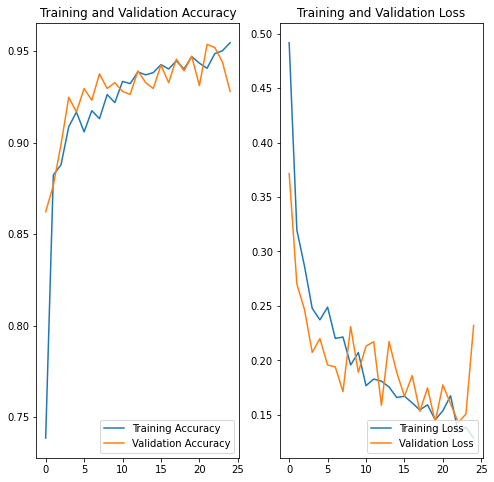

In [17]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

In [18]:
# Classification report & Confusion Matrix

preds = np.round(model.predict(test),0)

In [19]:
gt_class = test.classes
gt_labels = list(test.class_indices.keys())

In [20]:
cm = confusion_matrix(gt_class, preds)
print(cm)
print('The cnn model has an accuracy score of {:.2f} and recall score of {:.2f} for {:s}'.format((accuracy_score(gt_class, preds) *100),(recall_score(gt_class, preds) *100),gt_labels[1]))

[[157   1]
 [ 20 138]]
The cnn model has an accuracy score of 93.35 and recall score of 87.34 for PNEUMONIA


In [21]:
report = classification_report(gt_class, preds, target_names=gt_labels)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.89      0.99      0.94       158
   PNEUMONIA       0.99      0.87      0.93       158

    accuracy                           0.93       316
   macro avg       0.94      0.93      0.93       316
weighted avg       0.94      0.93      0.93       316



In [22]:
model.save('../models/chest_x_ray_pneumonia_detection.h5')